# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

### ROZWIĄZANIE 1.1

Nie jest możliwe różniczkowanie podanej funkcji na całym przedziale ponieważ argument logarytmu musi być liczbą większą od 0 więc warunkiem jest 1+tan(x) > 0 czyli nie jest możliwe całkowanie mniej więcej na połowie przedziału, obszar gdzie nie można całkować powtarza się okresowo. Dodatkowo pojawiają się miejsca nieciągłości, których też nie możemy objąć naszym przedziałem całkowania.

### ROZWIĄZANIE 1.2

In [87]:
from scipy import integrate as inte
import numpy as np

a = 0
b = math.pi/4

#NASZA FUNKCJA
f = lambda x : np.log10(1+np.tan(x))
x = np.linspace(0,np.pi/4,1025)
y = f(x)

#OBLICZENIA DLA RÓŻNYCH DX
for dx in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]:
    solutionTrap = inte.trapz(y,x, dx = dx)
    solutionSimp = inte.simps(y,x, dx = dx)
    solutionRomb = inte.romb(y, dx = dx)

    print("dx = ",dx)
    print("Wynik za pomocą metody trapezów: ",solutionTrap)
    print("Wynik za pomocą metody Simpsona: ",solutionSimp)
    print("Wynik za pomocą metody Romb: ",solutionRomb,"\n\n")

#OBLICZENIA DLA RÓŻNYCH DŁUGOŚCI WEKTORA 

for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    n = 2**i+1
    x = np.linspace(0,np.pi/4,n)
    y = f(x)
    solutionTrap = inte.trapz(y,x)
    solutionSimp = inte.simps(y,x)
    solutionRomb = inte.romb(y)
    print("n = ",n)
    print("Wynik za pomocą metody trapezów: ",solutionTrap)
    print("Wynik za pomocą metody Simpsona: ",solutionSimp)
    print("Wynik za pomocą metody Romberga: ",solutionRomb,"\n\n")

dx =  1e-05
Wynik za pomocą metody trapezów:  0.11821420286101632
Wynik za pomocą metody Simpsona:  0.11821420286101633
Wynik za pomocą metody Romb:  0.0015412735777995835 


dx =  0.0001
Wynik za pomocą metody trapezów:  0.11821420286101632
Wynik za pomocą metody Simpsona:  0.11821420286101633
Wynik za pomocą metody Romb:  0.015412735777995835 


dx =  0.001
Wynik za pomocą metody trapezów:  0.11821420286101632
Wynik za pomocą metody Simpsona:  0.11821420286101633
Wynik za pomocą metody Romb:  0.15412735777995834 


dx =  0.01
Wynik za pomocą metody trapezów:  0.11821420286101632
Wynik za pomocą metody Simpsona:  0.11821420286101633
Wynik za pomocą metody Romb:  1.5412735777995836 


dx =  0.1
Wynik za pomocą metody trapezów:  0.11821420286101632
Wynik za pomocą metody Simpsona:  0.11821420286101633
Wynik za pomocą metody Romb:  15.412735777995834 


dx =  1
Wynik za pomocą metody trapezów:  0.11821420286101632
Wynik za pomocą metody Simpsona:  0.11821420286101633
Wynik za pomocą meto

### Wnioski:
Nawet gdy podamy dx = 1000 to jeśli zdefiniowaliśmy wektor x to nie ma znaczenia dla wyniku wartość dx, funkcja nadal działa dobrze, co może być trochę zaskakujące. Wartość zależy od n tylko dla małych wartości "n", wtedy są zauważalne róznice, jednak dla n > 60 już nie ma znacznych róznic w dokładności.

### ROZWIĄZANIE 1.3

In [68]:
def time_check(func):
    print('Timing: ')
    saved_timing= %timeit -r 5 -n 10 -o func()
    saved_timing.average
    saved_timing.stdev
    print('\n')

def time_quad():
    a = 0
    b = np.pi/4
    f = lambda x : np.log10(1+np.tan(x))
    sol = inte.quad(f,a,b)

def time_romberg():
    a = 0
    b = np.pi/4
    f = lambda x : np.log10(1+np.tan(x))
    sol = inte.romberg(f,a,b)

def time_quadrature():
    a = 0
    b = np.pi/4
    f = lambda x : np.log10(1+np.tan(x))
    sol = inte.quadrature(f,a,b)

def time_trapz():
    f = lambda x : np.log10(1+np.tan(x))
    x = np.linspace(0,np.pi/4,1025)
    y = f(x)
    sol = inte.trapz(y,x)

def time_simps():
    f = lambda x : np.log10(1+np.tan(x))
    x = np.linspace(0,np.pi/4,1025)
    y = f(x)
    sol = inte.simps(y,x)

def time_romb():
    f = lambda x : np.log10(1+np.tan(x))
    x = np.linspace(0,np.pi/4,1025)
    y = f(x)
    sol = inte.romb(y)


#PORÓWNANIE CZASÓW DZIAŁANIA 

print('Metoda Quad: \n')
time_check(time_quad)

print('Metoda Romberg: \n')
time_check(time_romberg)

print('Metoda Quadrature: \n')
time_check(time_quadrature)

print('Metoda Trapz: \n')
time_check(time_trapz)

print('Metoda Simps: \n')
time_check(time_simps)

print('Metoda Romb: \n')
time_check(time_romb)


#PORÓWNANIE WYNIKÓW OBLICZEŃ
a = 0 
b = np.pi/4
f = lambda x : np.log10(1+np.tan(x))

sol_quad = inte.quad(f,a,b)
sol_romberg = inte.romberg(f,a,b)
sol_quadrature = inte.quadrature(f,a,b)

print("Wynik za pomocą metody Quad: ",sol_quad[0])
print("Wynik za pomocą metody Romberga: ",sol_romberg)
print("Wynik za pomocą metody Quadrature: ",sol_quadrature[0],"\n\n")

Metoda Quad: 

Timing: 
53.6 µs ± 1.33 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Romberg: 

Timing: 
27 µs ± 2.51 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Quadrature: 

Timing: 
30.5 µs ± 1.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Trapz: 

Timing: 
The slowest run took 4.63 times longer than the fastest. This could mean that an intermediate result is being cached.
88.9 µs ± 72 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Simps: 

Timing: 
82.9 µs ± 15.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Romb: 

Timing: 
142 µs ± 10 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Wynik za pomocą metody Quad:  0.1182142028610163
Wynik za pomocą metody Romberga:  0.11821420286101629
Wynik za pomocą metody Quadrature:  0.11821420286101635 




### Wnioski: 
Metoda Romb liczy niepoprawnie oraz działa najdłużej. To, że metody Trapz, Simps oraz Romb działają najdłużej wynika także z tego, że najpierw należy policzyc dla nich wektor x oraz wektor y. Nie porównuję więc wprost czasu działania metod liczących całki, tylko czas wykonania całej operacji, razem z obliczeniem wektora x oraz wektora y (bo aby policzyć czas liczenia daną metodą trzeba te wektory policzyć, więc niesprawiedliwym podejściem byłoby porównanie samego czasu działania metod obliczających całki) Najszybciej działającą metodą jest Metoda Romberg, co może szokować, gdyż powinny one opierać się o podobny algorytm. Wszystkie wyniki są do siebie zbliżone, różnią się na poziomie zera maszynowego, jedynie metoda Romb nie działa poprawnie.

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

### ROZWIĄZANIE 2.1
Tę funkcję można całkować na całym przedziale.

### ROZWIĄZANIE 2.2

dx =  1e-05
Wynik za pomocą metody trapezów:  1.4626521779663737
Wynik za pomocą metody Simpsona:  1.4626517459074564
Wynik za pomocą metody Romberga:  0.014977553878089538 


dx =  0.0001
Wynik za pomocą metody trapezów:  1.4626521779663737
Wynik za pomocą metody Simpsona:  1.4626517459074564
Wynik za pomocą metody Romberga:  0.1497755387808954 


dx =  0.001
Wynik za pomocą metody trapezów:  1.4626521779663737
Wynik za pomocą metody Simpsona:  1.4626517459074564
Wynik za pomocą metody Romberga:  1.4977553878089536 


dx =  0.01
Wynik za pomocą metody trapezów:  1.4626521779663737
Wynik za pomocą metody Simpsona:  1.4626517459074564
Wynik za pomocą metody Romberga:  14.977553878089541 


dx =  0.1
Wynik za pomocą metody trapezów:  1.4626521779663737
Wynik za pomocą metody Simpsona:  1.4626517459074564
Wynik za pomocą metody Romberga:  149.7755387808954 


dx =  1
Wynik za pomocą metody trapezów:  1.4626521779663737
Wynik za pomocą metody Simpsona:  1.4626517459074564
Wynik za pomocą m

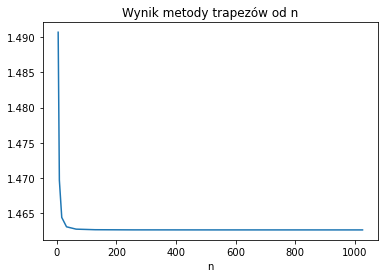

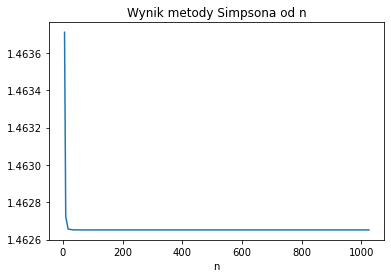

In [89]:
from scipy import integrate as inte
import numpy as np
from matplotlib import pyplot as plt

a = 0
b = 1

#NASZA FUNKCJA
f = lambda x : np.exp(x**2)
x = np.linspace(0,1,1025)
y = f(x)

#OBLICZENIA DLA RÓŻNYCH DX
for dx in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 1000]:
    solutionTrap = inte.trapz(y,x, dx = dx)
    solutionSimp = inte.simps(y,x, dx = dx)
    solutionRomb = inte.romb(y, dx = dx)

    print("dx = ",dx)
    print("Wynik za pomocą metody trapezów: ",solutionTrap)
    print("Wynik za pomocą metody Simpsona: ",solutionSimp)
    print("Wynik za pomocą metody Romberga: ",solutionRomb,"\n\n")

#OBLICZENIA DLA RÓŻNYCH DŁUGOŚCI WEKTORA 
ns = list()
solutionsTrapList = list()
solutionsSimpList = list()
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    n = 2**i+1
    ns.append(n)
    x = np.linspace(0,1,n)
    y = f(x)

    solutionTrap = inte.trapz(y,x)
    solutionsTrapList.append(solutionTrap)

    solutionSimp = inte.simps(y,x)
    solutionsSimpList.append(solutionSimp)

    solutionRomb = inte.romb(y)
    print("n = ",n)
    print("Wynik za pomocą metody trapezów: ",solutionTrap)
    print("Wynik za pomocą metody Simpsona: ",solutionSimp)
    print("Wynik za pomocą metody Romb: ",solutionRomb,"\n\n")

fig, ax1 = plt.subplots()
ax1.plot(ns,solutionsTrapList)
ax1.set(title='Wynik metody trapezów od n',xlabel='n')


fig, ax2 = plt.subplots()
ax2.plot(ns,solutionsSimpList)
ax2.set(title='Wynik metody Simpsona od n',xlabel='n')
plt.show()

### Wnioski:
Nawet gdy podamy dx = 1000 to jeśli zdefiniowaliśmy wektor x to nie ma znaczenia dla wyniku wartość dx, funkcja nadal działa dobrze, co może być trochę zaskakujące. Wartość zależy od n tylko dla małych wartości "n", wtedy są zauważalne róznice, jednak dla n > 60 już nie ma znacznych róznic w dokładności. Z wykresów widać, że metoda Simpsona jest minimalnie szybciej zbieżna.

### ROZWIĄZANIE 2.3

In [73]:
def time_check(func):
    print('Timing: ')
    saved_timing= %timeit -r 5 -n 10 -o func()
    saved_timing.average
    saved_timing.stdev
    print('\n')

def time_quad():
    a = 0
    b = 1
    f = lambda x : np.exp(x**2)
    sol = inte.quad(f,a,b)

def time_romberg():
    a = 0
    b = 1
    f = lambda x : np.exp(x**2)
    sol = inte.romberg(f,a,b)

def time_quadrature():
    a = 0
    b = 1
    f = lambda x : np.exp(x**2)
    sol = inte.quadrature(f,a,b)

def time_trapz():
    f = lambda x : np.exp(x**2)
    x = np.linspace(0,1,1025)
    y = f(x)
    sol = inte.trapz(y,x)

def time_simps():
    f = lambda x : np.exp(x**2)
    x = np.linspace(0,1,1025)
    y = f(x)
    sol = inte.simps(y,x)

def time_romb():
    f = lambda x : np.exp(x**2)
    x = np.linspace(0,1,1025)
    y = f(x)
    sol = inte.romb(y)


#PORÓWNANIE CZASÓW DZIAŁANIA 

print('Metoda Quad: \n')
time_check(time_quad)

print('Metoda Romberg: \n')
time_check(time_romberg)

print('Metoda Quadrature: \n')
time_check(time_quadrature)

print('Metoda Trapz: \n')
time_check(time_trapz)

print('Metoda Simps: \n')
time_check(time_simps)

print('Metoda Romb: \n')
time_check(time_romb)


#PORÓWNANIE WYNIKÓW OBLICZEŃ
a = 0 
b = 1
f = lambda x : np.exp(x**2)

sol_quad = inte.quad(f,a,b)
sol_romberg = inte.romberg(f,a,b)
sol_quadrature = inte.quadrature(f,a,b)

print("Wynik za pomocą metody Quad: ",sol_quad[0])
print("Wynik za pomocą metody Romberga: ",sol_romberg)
print("Wynik za pomocą metody Quadrature: ",sol_quadrature[0],"\n\n")

Metoda Quad: 

Timing: 
26.7 µs ± 1.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Romberg: 

Timing: 
150 µs ± 6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Quadrature: 

Timing: 
98.7 µs ± 1.87 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Trapz: 

Timing: 
The slowest run took 4.67 times longer than the fastest. This could mean that an intermediate result is being cached.
115 µs ± 71 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Simps: 

Timing: 
88.1 µs ± 37 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Metoda Romb: 

Timing: 
139 µs ± 5.48 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Wynik za pomocą metody Quad:  1.4626517459071815
Wynik za pomocą metody Romberga:  1.4626517459101032
Wynik za pomocą metody Quadrature:  1.4626517458962958 




### Wnioski: 
Metoda Romb liczy niepoprawnie oraz działa najdłużej. To, że metody Trapz, Simps oraz Romb działają dłużej wynika także z tego, że najpierw należy policzyc dla nich wektor x oraz wektor y. Nie porównuję więc wprost czasu działania metod liczących całki, tylko czas wykonania całej operacji, razem z obliczeniem wektora x oraz wektora y (bo aby policzyć czas liczenia daną metodą trzeba te wektory policzyć, więc niesprawiedliwym podejściem byłoby porównanie samego czasu działania metod obliczających całki) Najszybciej działającą metodą jest Metoda Quad, widać więc, że metoda działająca najszybciej zależy od postawionego postawionego problemu i funkcji, której całkę staramy się obliczyć. Tak, tak... ma to sens! Funkcje mogą mieć różne kształty, więc różne kształty mogą je najlepiej dopasowywać.. Wyobraźmy sobie taką chorą sytuacje - że chce my przybliżyć funkcję heaviside'a wielomianem... no jak... W takim przypadku to zwykła metoda prostokątów będzie Czempionem. Zaskakujące, jednak prawdziwe. Problem jest jedynie z metodą Romb, ona to nadaje się tylko do pokazania jak nie liczyć całek.